In [1]:
"""
Comparison of NavierStokes control methods
"""

import jax.numpy as jnp
from updec import *

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='ticks',
        font='sans-serif', font_scale=1, color_codes=True, rc={"lines.linewidth": 3})

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.0112102s, CPU 0.011205s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.019783s, CPU 0.019782s)
Info    : 1385 nodes 2780 elements
Info    : Writing './data/Comparison/mesh.msh'...
Info    : Done writing './data/Comparison/mesh.msh'
Info    : Writing './data/Comparison/mesh.vtk'...
Info    : Done writing './data/Comparison/mesh.vtk'


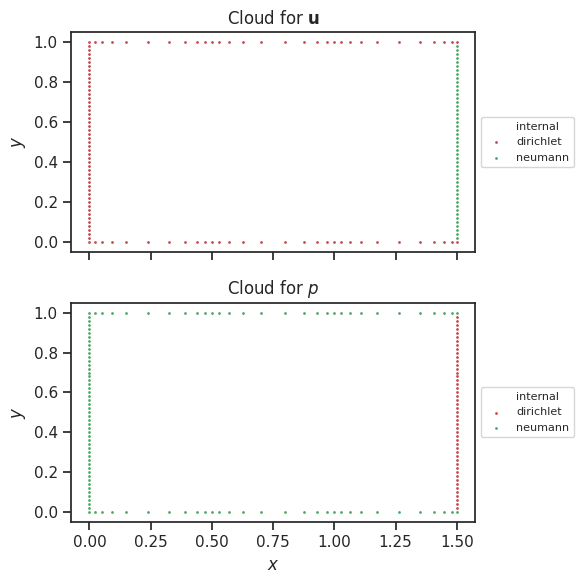

In [2]:
DATAFOLDER = "./data/Comparison/"
Nx = 100
Ny = Nx


facet_types_vel = {"Wall":"d", "Inflow":"d", "Outflow":"n", "Blowing":"d", "Suction":"d"}
facet_types_phi = {"Wall":"n", "Inflow":"n", "Outflow":"d", "Blowing":"n", "Suction":"n"}

cloud_vel = GmshCloud(filename="./meshes/channel_blowing_suction.py", facet_types=facet_types_vel, mesh_save_location=DATAFOLDER)
cloud_phi = GmshCloud(filename=DATAFOLDER+"mesh.msh", facet_types=facet_types_phi)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,3*2), sharex=True)
cloud_vel.visualize_cloud(ax=ax1, s=1, title=r"Cloud for $\mathrm{\mathbf{u}}$", xlabel=False);
cloud_phi.visualize_cloud(ax=ax2, s=1, title=r"Cloud for $p$");

In [3]:
print("Loading arrays for DAL")

dal_arrays = jnp.load(DATAFOLDER+"dal.npz")
dal_names = dal_arrays.files
print(dal_names)

Loading arrays for DAL
['objective_cost', 'outflow_mse', 'optimal_control', 'mem_time']


In [4]:
print("Loading arrays for DP")

dp_arrays = jnp.load(DATAFOLDER+"dp.npz")
dp_names = dp_arrays.files
print(dp_names)

Loading arrays for DP
['objective_cost', 'outflow_final_mse', 'optimal_control', 'mem_time']


In [5]:
print("Loading arrays for PINN forward")

pinnf_arrays = jnp.load(DATAFOLDER+"pinn_forward.npz")
pinnf_names = pinnf_arrays.files
print(pinnf_names)

Loading arrays for PINN forward
['mom_loss', 'cont_loss', 'bc_loss', 'mem_time']


In [6]:
print("Loading arrays for PINN inverse step 1")

Wj_id = 3
pinn1_arrays = jnp.load(DATAFOLDER+"pinn_inv_1_"+str(Wj_id)+".npz")
pinn1_names = pinn1_arrays.files
print(pinn1_names)

Loading arrays for PINN inverse step 1
['objective_cost', 'mom_loss', 'cont_loss', 'bc_loss', 'pinn_control', 'pinn_sol_control', 'u_target', 'u_outlet', 'v_target', 'v_outlet', 'mem_time_cum']


In [7]:
print("Loading arrays for PINN inverse step 2")

Wj_id = 8
pinn2_arrays = jnp.load(DATAFOLDER+"pinn_inv_2_"+str(Wj_id)+".npz")
pinn2_names = pinn2_arrays.files
print(pinn2_names)

pinn2_arrays['mem_time_cum']

Loading arrays for PINN inverse step 2
['objective_cost', 'mom_loss', 'cont_loss', 'bc_loss', 'pinn_control', 'pinn_sol_control', 'u_target', 'u_outlet', 'v_target', 'v_outlet', 'mem_time_cum']


array([4.40406932e+08, 2.39530737e+04])

In [8]:
print("Loading arrays for PINN inverse step 3")

Wj_id = 0
pinn3_arrays = jnp.load(DATAFOLDER+"pinn_inv_3_"+str(Wj_id)+".npz")
pinn3_names = pinn3_arrays.files
print(pinn3_names)

Loading arrays for PINN inverse step 3
['objective_cost', 'mom_loss', 'cont_loss', 'bc_loss', 'pinn_control', 'pinn_sol_control', 'vel_solution', 'p_solution', 'u_target', 'u_outlet', 'v_target', 'v_outlet', 'mem_time_cum']


In [9]:
print("Loading arrays for PINN inverse: weight vs cost")

pinn_inv_final_arrays = jnp.load(DATAFOLDER+"pinn_inv_2_final.npz")
pinn_final_names = pinn_inv_final_arrays.files
print(pinn_final_names)

Loading arrays for PINN inverse: weight vs cost
['weight_list', 'cost_list']


In [10]:
## Print mem times
print("On CPU")
dal_mem_time = dal_arrays["mem_time"]
print(f"    DAL mem: {dal_mem_time[0]*1e-9:.2f} GB")
print(f"    DAL time: {dal_mem_time[1]/3600:.2f} Hours")


dp_mem_time = dp_arrays["mem_time"]
print()
print(f"    DP mem: {dp_mem_time[0]*1e-9:.2f} GB")
print(f"    DP time: {dp_mem_time[1]/3600:.2f} Hours")


mems = []
times = []
for Wj_id in range(0, 9):
    pinn1_arrs = jnp.load(DATAFOLDER+"pinn_inv_1_"+str(Wj_id)+".npz")
    mems.append(pinn1_arrs["mem_time_cum"][0])
    times.append(pinn1_arrs["mem_time_cum"][1])
tot_mem1 = max(mems)
tot_time1 = max(times)

mems = []
times = []
for Wj_id in range(0, 9):
    pinn2_arrs = jnp.load(DATAFOLDER+"pinn_inv_2_"+str(Wj_id)+".npz")
    mems.append(pinn2_arrs["mem_time_cum"][0])
    times.append(pinn2_arrs["mem_time_cum"][1])
tot_mem2 = max(mems)
tot_time2 = max(times)

print()
print("On GPU")
print(f"    PINN mem: {(tot_mem1+tot_mem2)*1e-9:.2f} GB")
print(f"    PINN time: {(tot_time1+tot_time2)/3600:.2f} Hours")

On CPU
    DAL mem: 0.11 GB
    DAL time: 16.29 Hours

    DP mem: 0.07 GB
    DP time: 22.92 Hours

On GPU
    PINN mem: 0.85 GB
    PINN time: 13.56 Hours


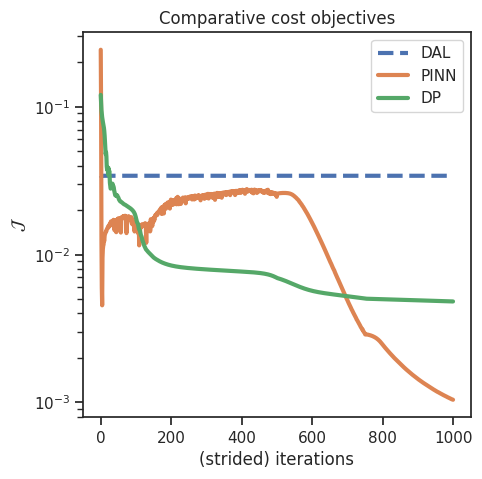

In [11]:
## ACTUAL PLOTTING STARTS HERE


## Plot the cost comparison

dal_cost = dal_arrays["objective_cost"]
dp_cost = dp_arrays["objective_cost"]
pinn1_cost = pinn1_arrays["objective_cost"]
pinn2_cost = pinn2_arrays["objective_cost"]

dal_list = list(dal_cost) + [dal_cost[-1]]*(len(dp_cost)-len(dal_cost))
dal_cost = jnp.array(dal_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(dal_cost, "--", label="DAL")
# ax.plot(pinn1_cost[::len(pinn1_cost)//len(dal_cost)], label="PINN")
ax.plot(pinn2_cost[::len(pinn2_cost)//len(dp_cost)], label="PINN")
ax.plot(dp_cost, label="DP")

ax.legend()
ax.set_yscale("log")
ax.set_xlabel("(strided) iterations")
ax.set_ylabel(r'$ \mathcal{J} $')
ax.set_title("Comparative cost objectives")

plt.savefig(DATAFOLDER+'costs.pdf', backend='pgf', bbox_inches='tight')

plt.show()

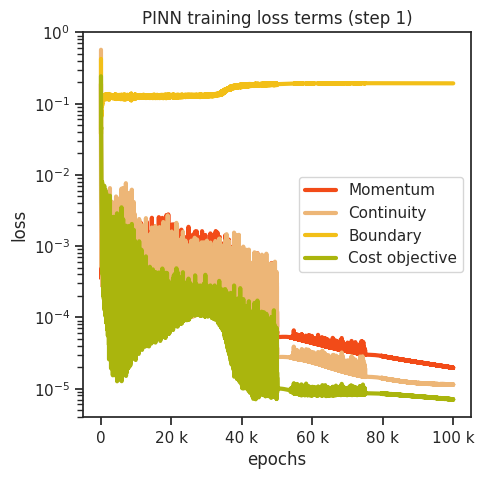

In [12]:
## Plot the PINN losses (During step 1)

pinn1_in = pinn1_arrays["mom_loss"]
pinn1_co = pinn1_arrays["cont_loss"]
pinn1_bc = pinn1_arrays["bc_loss"]
pinn1_ct = pinn1_arrays["objective_cost"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
## Only use shades of orange
ax.plot(pinn1_in, label="Momentum", color='#f24b18')
ax.plot(pinn1_co, label="Continuity", color='#edb677')
ax.plot(pinn1_bc, label="Boundary", color='#f2bf18')
ax.plot(pinn1_ct, label="Cost objective", color='#aab50d')

ax.xaxis.set_major_formatter(ticker.EngFormatter())

ax.legend()
ax.set_yscale("log")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.set_title("PINN training loss terms (step 1)")

plt.savefig(DATAFOLDER+'pinn_losses_step_1.pdf', backend='pgf', bbox_inches='tight')

plt.show()

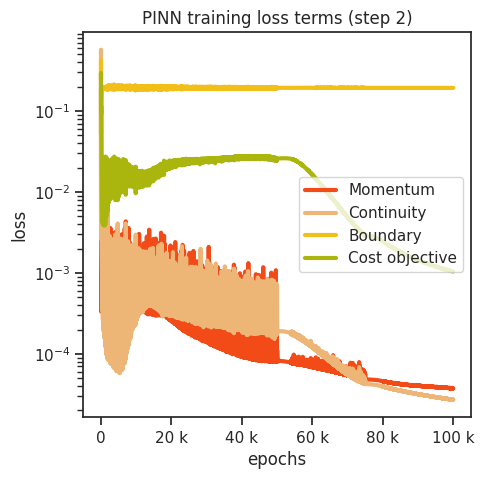

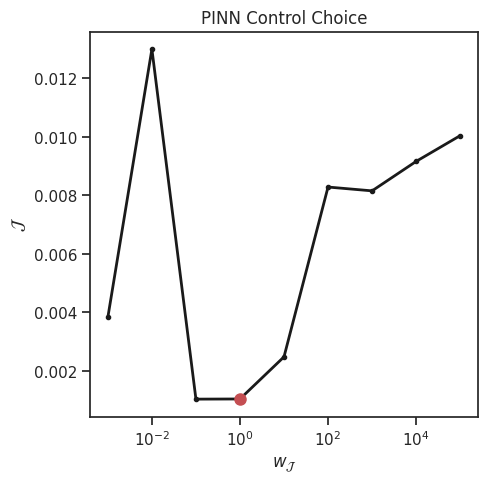

In [13]:
## Plot the PINN losses (During step 2)

pinn2_in = pinn2_arrays["mom_loss"]
pinn2_co = pinn2_arrays["cont_loss"]
pinn2_bc = pinn2_arrays["bc_loss"]
pinn2_ct = pinn2_arrays["objective_cost"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
## Only use shades of orange
ax.plot(pinn2_in, label="Momentum", color='#f24b18')
ax.plot(pinn2_co, label="Continuity", color='#edb677')
ax.plot(pinn2_bc, label="Boundary", color='#f2bf18')
ax.plot(pinn2_ct, label="Cost objective", color='#aab50d')

ax.xaxis.set_major_formatter(ticker.EngFormatter())

ax.legend(loc="right")
ax.set_yscale("log")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.set_title("PINN training loss terms (step 2)")

plt.savefig(DATAFOLDER+'pinn_losses_step_2.pdf', backend='pgf', bbox_inches='tight')

plt.show()



## Plot the cost vs weight

weights = pinn_inv_final_arrays["weight_list"]
costs = pinn_inv_final_arrays["cost_list"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(weights, costs, "k.-", lw=2)
ax.plot(weights[3], costs[3], "ro", markersize=8)

ax.set_xscale("log")
# ax.set_yscale("log")

ax.set_xlabel(r"$w_{\mathcal{J}}$")
ax.set_ylabel(r'$ \mathcal{J} $')
ax.set_title("PINN Control Choice")

plt.savefig(DATAFOLDER+'pinn_choice.pdf', backend='pgf', bbox_inches='tight')

plt.show()

(49,)
(49,)


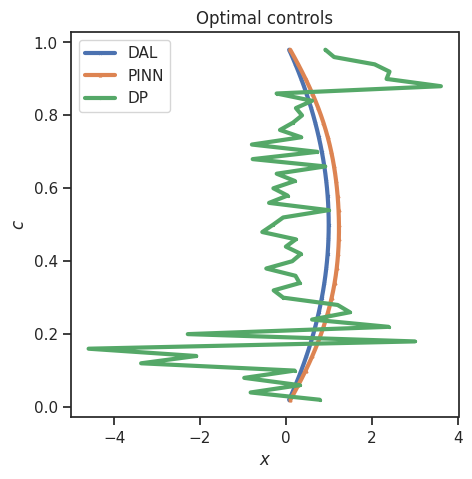

In [14]:
## Plot the control

in_ids = cloud_vel.facet_nodes["Inflow"]
y_in = cloud_vel.sorted_nodes[in_ids, 1]

dal_control = jnp.array(dal_arrays["optimal_control"])
pinn1_control = pinn1_arrays["pinn_control"]
# pinn2_control = pinn2_arrays["optimal_bcn_c"]
dp_control = jnp.array(dp_arrays["optimal_control"])

print(y_in.shape)
print(pinn1_control.shape)

MKE = 2
MKS = 2
LW = 3

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(dal_control, y_in, "x-", markevery=MKE, markersize=MKS, lw=LW, label="DAL")
ax.plot(pinn1_control, y_in, "^-", markevery=MKE, markersize=MKS, lw=LW, label="PINN")
ax.plot(dp_control, y_in, "*-", markevery=MKE, markersize=MKS, lw=LW, label="DP")


ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$c$")
ax.set_title("Optimal controls")

plt.savefig(DATAFOLDER+'controls.pdf', backend='pgf', bbox_inches='tight')

plt.show()

In [15]:
## LOAD or MAKE SOLS and OUTLET VELS

# simulate_forward_navier_stokes = __import__('30_channel_flow_blowing_suction').simulate_forward_navier_stokes

# forward_sim_args = {"cloud_vel":cloud_vel,
#                     "cloud_phi": cloud_phi,
#                     "inflow_control":None,
#                     "NB_ITER":100,
#                     "RBF":polyharmonic,
#                     "MAX_DEGREE":1    
#                     }

out_ids = jnp.array(cloud_vel.facet_nodes["Outflow"])
y_out = cloud_vel.sorted_nodes[out_ids, 1]


# forward_sim_args["inflow_control"] = dal_control
# u_list, v_list, vel_list, p_list = simulate_forward_navier_stokes(**forward_sim_args)
# dal_outlet_u = u_list[-1][out_ids]
# dal_outlet_v = v_list[-1][out_ids]
# dal_vel = vel_list[-1]
# dal_p = p_list[-1]
# jnp.savez(DATAFOLDER+"dal_sol", outlet_u=dal_outlet_u, outlet_v=dal_outlet_v, vel=dal_vel, p=dal_p)

dals_sol_array = jnp.load(DATAFOLDER+"dal_sol.npz")
dal_outlet_u = dals_sol_array["outlet_u"]
dal_outlet_v = dals_sol_array["outlet_v"]
dal_vel = dals_sol_array["vel"]
dal_p = dals_sol_array["p"]

# forward_sim_args["inflow_control"] = dp_control
# forward_sim_args["NB_ITER"] = 4
# u_list, v_list, vel_list, p_list = simulate_forward_navier_stokes(**forward_sim_args)
# dp_outlet_u = u_list[-1][out_ids]
# dp_outlet_v = v_list[-1][out_ids]
# dp_vel = vel_list[-1]
# dp_p = p_list[-1]
# jnp.savez(DATAFOLDER+"dp_sol", outlet_u=dp_outlet_u, outlet_v=dp_outlet_v, vel=dp_vel, p=dp_p)

dp_sol_arrays = jnp.load(DATAFOLDER+"dp_sol.npz")
dp_outlet_u = dp_sol_arrays["outlet_u"]
dp_outlet_v = dp_sol_arrays["outlet_v"]
dp_vel = dp_sol_arrays["vel"]
dp_p = dp_sol_arrays["p"]

u_target = pinn3_arrays["u_target"]
v_target = pinn3_arrays["v_target"]
pinn_outlet_u = pinn3_arrays["u_outlet"]
pinn_outlet_v = pinn3_arrays["v_outlet"]
pinn_vel = pinn3_arrays["vel_solution"]
pinn_p = pinn3_arrays["p_solution"]

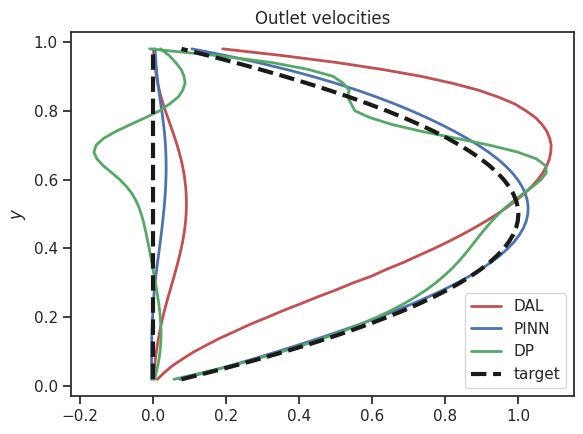

In [16]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "r-", label=r"DAL", y_label=r"$y$", figsize=(6,4.5), lw=LW)
plot(dal_outlet_v, y_out, "r-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "b-", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "b-", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

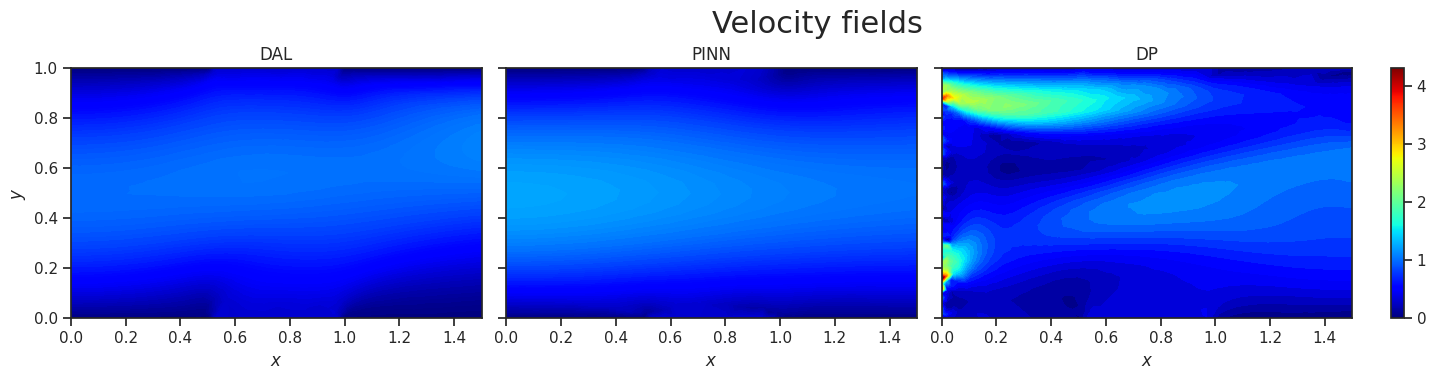

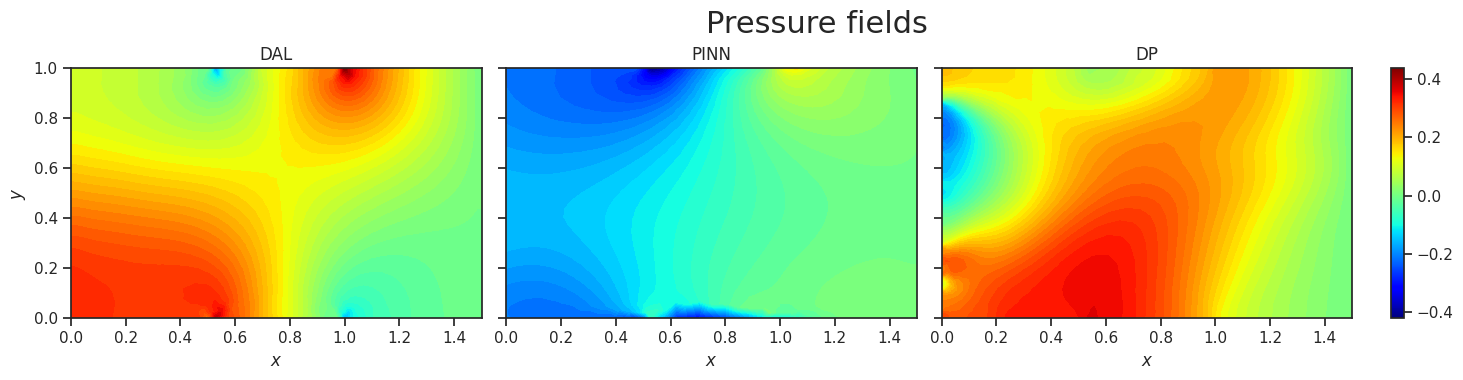

In [17]:
## Plot the COMPLETE VELOCITIES

vmax = max([pinn_vel.max(), dal_vel.max(), dp_vel.max()])
vmax=4.3

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5.5*3,3.6), sharey=True)
_, img1 = cloud_vel.visualize_field(dal_vel, cmap="jet", projection="2d", title="DAL", ax=ax1, vmin=0, vmax=vmax, colorbar=False)
_, img2 = cloud_vel.visualize_field(pinn_vel, cmap="jet", projection="2d", title="PINN", ax=ax2, vmin=0, vmax=vmax, colorbar=False, ylabel=None)
_, img3 = cloud_vel.visualize_field(dp_vel, cmap="jet", projection="2d", title="DP", ax=ax3, vmin=0, vmax=vmax, colorbar=False, ylabel=None)

fig1.suptitle("Velocity fields", y=1.05, fontsize=22)
fig1.colorbar(ScalarMappable(norm=img3.norm, cmap=img3.cmap), ax=[ax1, ax2, ax3], location="right", pad=0.025)
plt.savefig(DATAFOLDER+'velocities.pdf', backend='pgf', bbox_inches='tight')


vmin = min([pinn_p.min(), dal_p.min(), dp_p.min()])
vmax = max([pinn_p.max(), dal_p.max(), dp_p.max()])

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5.5*3,3.6), sharey=True)
_, img1 = cloud_phi.visualize_field(dal_p, cmap="jet", projection="2d", title="DAL", ax=ax1, vmin=vmin, vmax=vmax, colorbar=False)
_, img2 = cloud_phi.visualize_field(pinn_p, cmap="jet", projection="2d", title="PINN", ax=ax2, vmin=vmin, vmax=vmax, colorbar=False, ylabel=None)
_, img3 = cloud_phi.visualize_field(dp_p, cmap="jet", projection="2d", title="DP", ax=ax3, vmin=vmin, vmax=vmax, colorbar=False, ylabel=None)

fig2.suptitle("Pressure fields", y=1.05, fontsize=22)
fig2.colorbar(ScalarMappable(norm=img3.norm, cmap=img3.cmap), ax=[ax1, ax2, ax3], location="right", pad=0.025);
plt.savefig(DATAFOLDER+'pressures.pdf', backend='pgf', bbox_inches='tight')

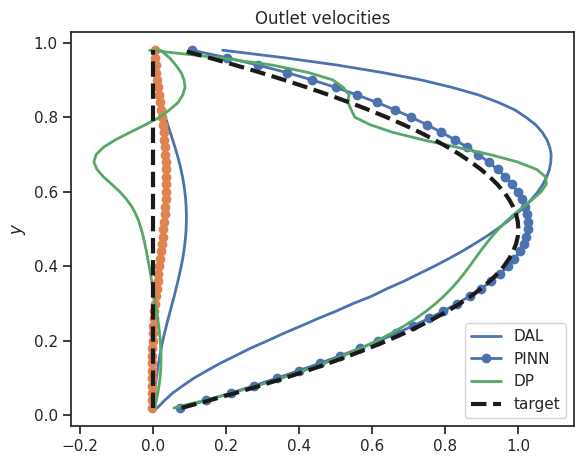

In [18]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "b-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "b-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "o-", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "o-", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

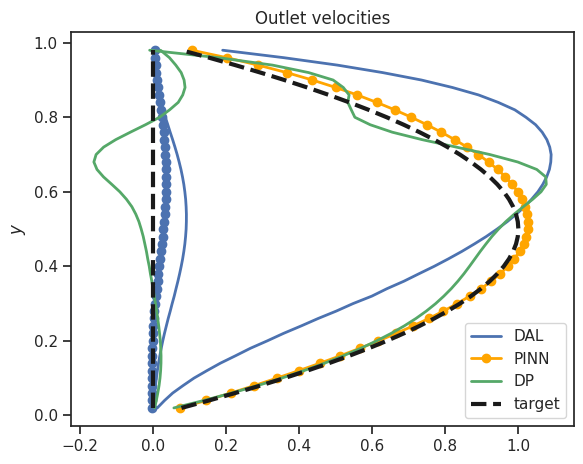

In [19]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "b-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "b-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "o-", color="orange", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "o-", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

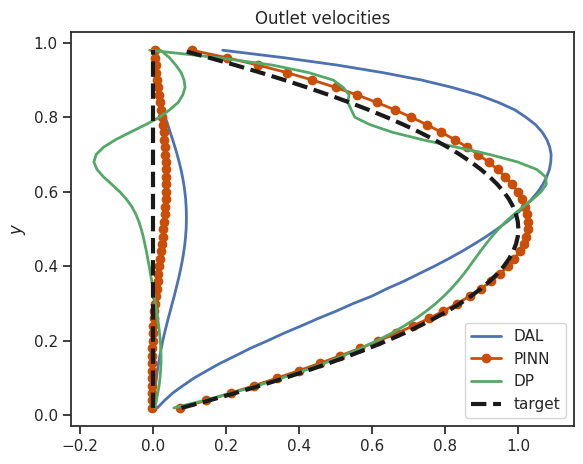

In [20]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "b-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "b-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "o-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "o-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

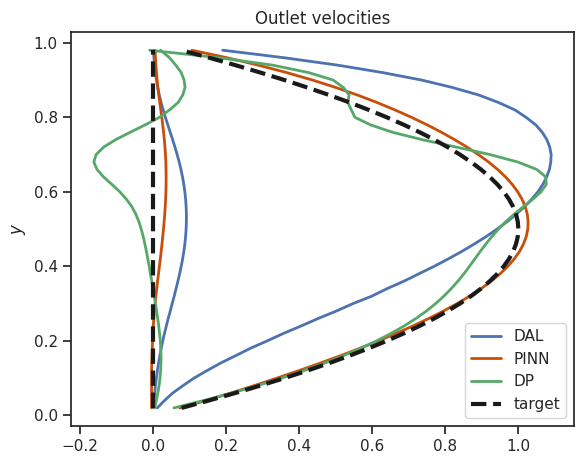

In [21]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "b-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "b-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

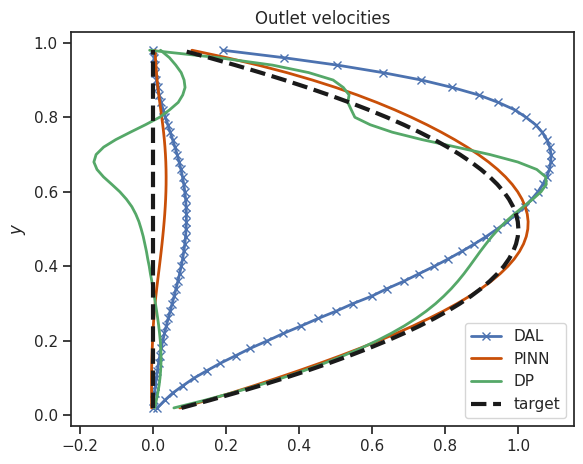

In [22]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

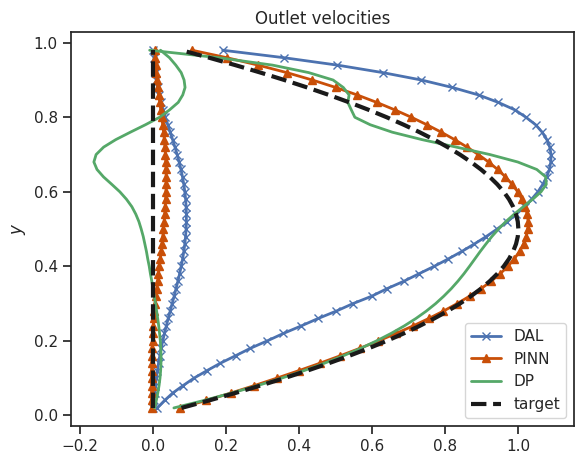

In [23]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "^-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "^-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "g-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "g-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

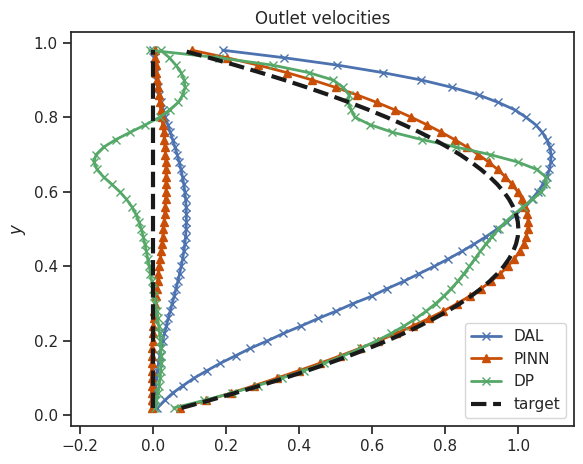

In [24]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "^-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "^-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

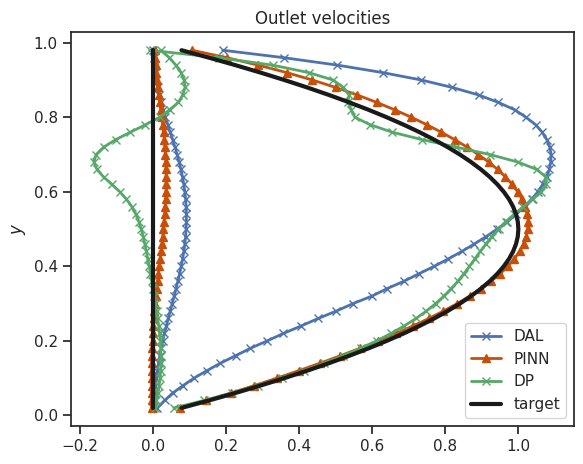

In [25]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, "^-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, "^-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k-", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k-", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

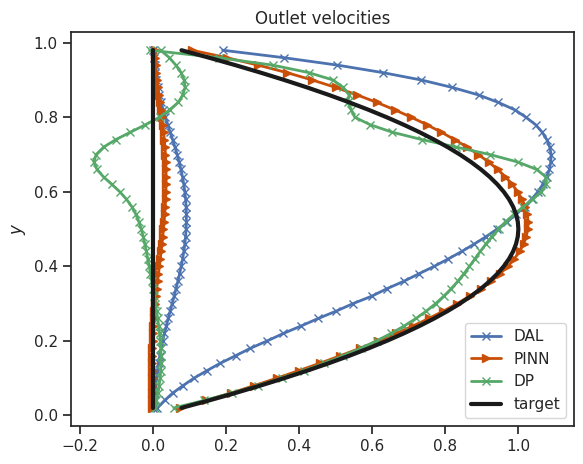

In [26]:
## Plot the OUTLET VELOCITIES

LW=2
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, ">-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, ">-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k-", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k-", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

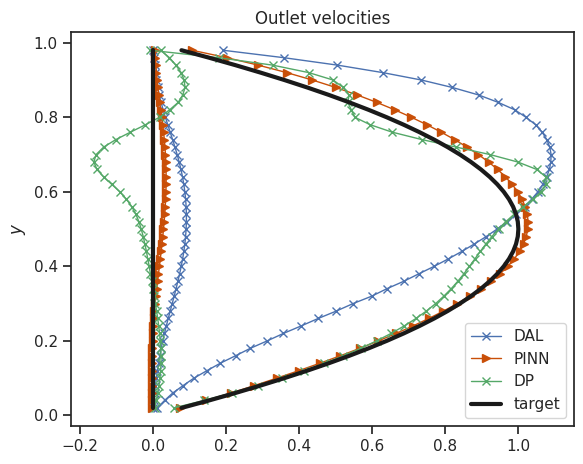

In [27]:
## Plot the OUTLET VELOCITIES

LW=1
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, ">-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, ">-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k-", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k-", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

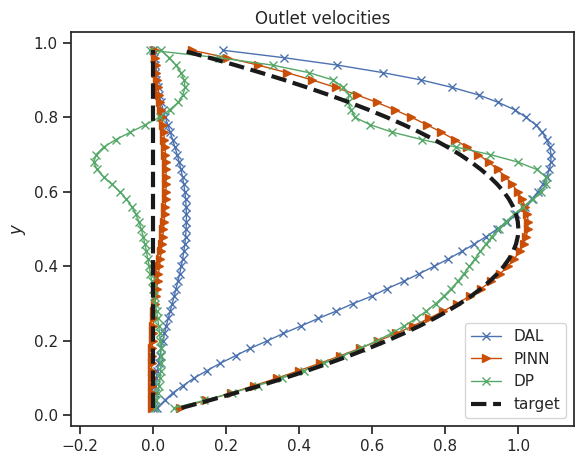

In [28]:
## Plot the OUTLET VELOCITIES

LW=1
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, ">-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, ">-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k--", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k--", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

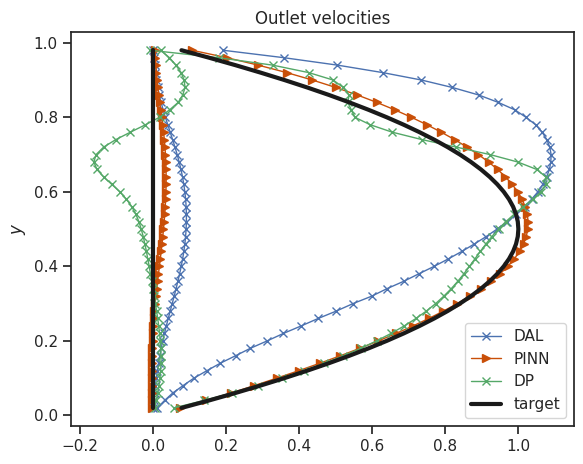

In [29]:
## Plot the OUTLET VELOCITIES

LW=1
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, ">-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, ">-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k-", ax=ax, label=r"target", lw=3)
plot(v_target, y_out, "k-", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')

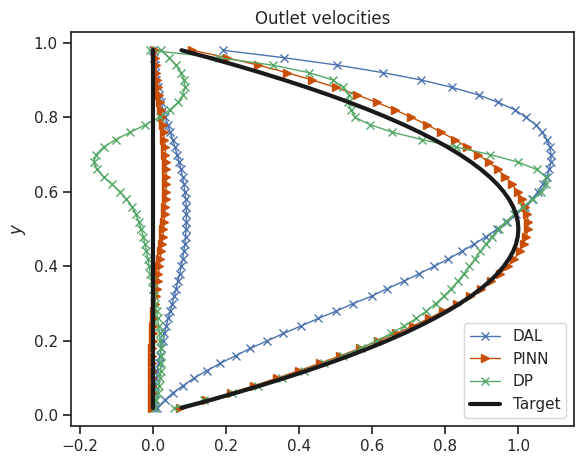

In [30]:
## Plot the OUTLET VELOCITIES

LW=1
ax = plot(dal_outlet_u, y_out, "bx-", label=r"DAL", y_label=r"$y$", figsize=(6,4.8), lw=LW)
plot(dal_outlet_v, y_out, "bx-", ax=ax, lw=LW)

plot(pinn_outlet_u, y_out, ">-", color="#c94f08", label=r"PINN", ax=ax, lw=LW)
plot(pinn_outlet_v, y_out, ">-", color="#c94f08", ax=ax, lw=LW)

plot(dp_outlet_u, y_out, "gx-", label=r"DP", ax=ax, lw=LW)
plot(dp_outlet_v, y_out, "gx-", ax=ax, lw=LW)

plot(u_target, y_out, "k-", ax=ax, label=r"Target", lw=3)
plot(v_target, y_out, "k-", ax=ax, lw=3, title="Outlet velocities");

plt.savefig(DATAFOLDER+'out_vels.pdf', backend='pgf', bbox_inches='tight')